In [2]:
from datetime import date
studentName="Gauri Damle"
studentEmail="damle.g@northeastern.edu"
homework=8
contributedPercentage=0
print('\033[1m' + 'IE 7300: Statistical learning for Engineering' + '\033[0m')
print("\n"*15)
print(f'Homework -{homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering
















Homework -8
Student name :Gauri Damle
Student Email :damle.g@northeastern.edu
















Percentage of Effort Contributed by Student : 0%
Submission Date: 2022-11-16


In [115]:
!jupyter nbconvert --to html /content/drive/MyDrive/SemesterThree/Stats7300/Assignment8/Assignment8.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SemesterThree/Stats7300/Assignment8/Assignment8.ipynb to html
[NbConvertApp] Writing 626047 bytes to /content/drive/MyDrive/SemesterThree/Stats7300/Assignment8/Assignment8.html


## Importing Modules

In [73]:
import warnings
warnings.filterwarnings("ignore")



#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
from sklearn.utils import shuffle
import statsmodels.api as sm
import itertools
import time
from mpl_toolkits import mplot3d
import numpy as np
from numpy.core.umath_tests import inner1d
from copy import deepcopy
from scipy import stats
from typing import Dict, Any
from scipy import optimize

# Python framework for implementing inheritance 
from abc import ABC,abstractmethod 

# Preprocessing methods
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Split the training and test dataset
from sklearn.model_selection import train_test_split

# Performance matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,\
                            mean_absolute_error,\
                            accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            make_scorer

## Question

Create custom classification models using the Bank Marketing dataset, https://archive-beta.ics.uci.edu/dataset/222/bank+marketing Links to an external site., and evaluate your model results. Split the dataset into training and test datasets 80:20.


 a) Create an SVM and Knn model. Fit the model using the training dataset, and find the model accuracy and confusion matrix. Explain each model's outcome and accuracy. (10 points) 

b) Compare the Knn model with a few K values and find the best k model. Describe each model performance (10 points)

c) Compare your SVM model with various kernel methods (linear, rbf, and polynomial). Explain each Kernal parameter (12 points)

d) Analyze your SVM and Knn model performance with outlier and imbalanced samples (make a sample from the given dataset).  How do the SVM and Knn models handle the outliers and imbalanced datasets with statistical evidence? (10 points)

Note: Do not use any libraries, and do not copy and paste some content from other blogs or books. I'd like you to write your answer.




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Input Data

In [54]:
data = pd.read_csv('/content/drive/MyDrive/SemesterThree/Stats7300/Assignment8/bank-additional-full.csv', delimiter = ";")

In [55]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [56]:
data.shape

(41188, 21)

## Null checks

In [8]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No null records are observed.

## Duplication checks

In [9]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## Summary Statistics

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From this summary statistics we can conclude following:-

#### Input variables:
  


#### bank client data:


   - age (numeric)
   - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   - default: has credit in default? (categorical: "no","yes","unknown")
   - housing: has housing loan? (categorical: "no","yes","unknown")
   - loan: has personal loan? (categorical: "no","yes","unknown")
   
#### related with the last contact of the current campaign:

- contact: contact communication type (categorical: "cellular","telephone") 

- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



#### other attributes:

  - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  - previous: number of contacts performed before this campaign and for this client (numeric)
  - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

#### social and economic context attributes

  - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  - cons.price.idx: consumer price index - monthly indicator (numeric)     
  - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  - euribor3m: euribor 3 month rate - daily indicator (numeric)
  - nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):

- y has the client subscribed a term deposit? (binary: "yes","no")




In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

From here we can see the Continouous/numeric and categotical features with their data types. 

For Univariate analysis lets first divide the features in **continuous** and **categorical**.

In [9]:
numeric_col = ['age','duration','campaign','pdays','previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
categ_col = ['job', 'day_of_week','marital', 'education','contact',  'month', 'poutcome']
binary_col =['default','housing','loan']

In [13]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Feature Encoding

In [57]:
labelencoder = LabelEncoder()

## Encoding numeric variables
for col in binary_col:
  data[col] = labelencoder.fit_transform(data[col])

In [58]:
## Encoding categorical variables
for col in categ_col:
  data[col] = labelencoder.fit_transform(data[col])

In [59]:
## Encoding target variable
## Using a dictionary 
value = {'no' : -1, 'yes' : 1}
 
data["y"] = data["y"].map(value)

In [60]:
data["y"].unique()

array([-1,  1])

## Define features and labels

In [14]:
# Data contains 15 feature variables and 1 target variable Wine CLASS
# Define features and labels

In [61]:
y=data["y"].values

In [62]:
data.loc[:, data.columns != 'y']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [63]:
x = data.loc[:, data.columns != 'y'].values

## Feature Scaling

In [64]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Split the dataset into training and test dataset 80:20

In [67]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=1234)

In [20]:
Xtrain.shape

(32950, 20)

In [21]:
Xtest.shape

(8238, 20)

In [22]:
Ytrain.shape

(32950,)

In [23]:
Ytest.shape

(8238,)

 ## **a) Create an SVM and KNN model. Fit the model using the training dataset, and find the model accuracy and confusion matrix. Explain each model's outcome and accuracy.**

### SVM Model - Supervised

In [105]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [106]:
clf = SVM()


In [107]:
clf.fit(Xtrain, Ytrain)
predictions = clf.predict(Xtrain)

In [41]:
#print(clf.w, clf.b)
print(predictions)

[-1. -1. -1. ... -1. -1. -1.]


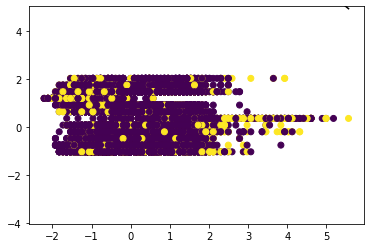

In [42]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=Ytrain)
    x0_1 = np.amin(Xtrain[:, 0])
    x0_2 = np.amax(Xtrain[:, 0])
    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")
    x1_min = np.amin(Xtrain[:, 1])
    x1_max = np.amax(Xtrain[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.show()
visualize_svm()

In [43]:
## Training accuracy
accuracy_score(Ytrain, predictions)

0.9073444613050076

In [108]:
predictions_test = clf.predict(Xtest)

In [109]:
## Test accuracy
accuracy_score(Ytest, predictions_test)

0.9085943190094683

In [110]:
cm_SVM = confusion_matrix(Ytest, predictions_test)

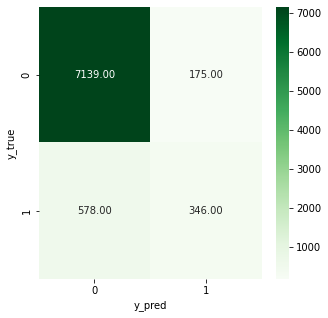

In [47]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm_SVM,annot = True, cmap = 'Greens', fmt='.2f')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### KNN Model - supervised

In [41]:
class KNN(ABC):
    """
    Base class for KNN implementations
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K      -> integer specifying number of neighbours to consider
            metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p      -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)
        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)
        # store/initialise input parameters
        self.K       = K
        self.metric  = metric
        self.p       = p
        self.X_train = np.array([])
        self.y_train = np.array([])
        
    def __del__(self) -> None:
        """
        Destructor function. 
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train
      
    def __minkowski(self, x : np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)
    
    def __cosine(self, x : np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))))
    
    def __distances(self, X : np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
            X -> numpy array of points [x]
        Outputs:
            D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)
        # return computed distances
        return D
    
    @abstractmethod
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass
        
    def fit(self, X : np.array, y : np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
            X -> numpy array containing the predictor features
            y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        
    def predict(self, X : np.array) -> np.array:
        """
        Public prediction function for the class. 
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
            X -> numpy array containing the predictor features
        Outputs:
           y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')
        # compute distances
        D = self.__distances(X)
        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]
        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)
        # return results
        return y_pred
    
    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

In [42]:
class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K       -> integer specifying number of neighbours to consider
            metric  -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p       -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)
        
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
            idx_neighbours -> indices of nearest neighbours
        Outputs:
            y_pred -> numpy array of prediction results
        """        
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()   
        # return result
        return y_pred

In [50]:
## define the scoring metrics ##
scoring_metrics = {'accuracy' : make_scorer(accuracy_score), 
                   'precision': make_scorer(precision_score),
                   'recall'   : make_scorer(recall_score),
                   'f1'       : make_scorer(f1_score)}

In [55]:
## define a helper function for our analysis ##
def cv_classifier_analysis(pipe : Any, 
                           X : np.array, 
                           y : np.array, 
                           k : int, 
                           scoring_metrics : Dict,
                           metric : str) -> None:
    """
    Function to carry out cross-validation analysis for input KNN classifier
    Inputs:
        pipe            -> input pipeline containing preprocessing and KNN classifier
        X               -> numpy array of predictors
        y               -> numpy array of labels
        k               -> integer value for number of nearest neighbours to consider
        scoring_metrics -> dictionary of scoring metrics to consider 
        metric          -> string indicating distance metric used
    """
    # print hyperparameter configuration
    print('RESULTS FOR K = {0}, {1}'.format(k,metric))

    # run cross validation
    dcScores = cross_validate(pipe,X,y,cv=StratifiedKFold(10),scoring=scoring_metrics)

    # report results
    print('Mean Accuracy: %.4f' % np.mean(dcScores['test_accuracy']))
    print('Mean Precision: %.4f' % np.mean(dcScores['test_precision']))
    print('Mean Recall: %.4f' % np.mean(dcScores['test_recall']))
    print('Mean F1: %.4f' % np.mean(dcScores['test_f1']))

In [52]:
# define the pipeline for manhatten distance
p_manhat = Pipeline([('scaler', StandardScaler()), ('knn', KNNClassifier(3, metric = 'minkowski', p = 1))])

In [56]:
# training accuracy
cv_classifier_analysis(p_manhat, Xtrain, Ytrain, 3, scoring_metrics, 'MANHATTEN DISTANCE')

RESULTS FOR K = 3, MANHATTEN DISTANCE
Mean Accuracy: 0.8967
Mean Precision: 0.5593
Mean Recall: 0.4004
Mean F1: 0.4663


In [58]:
# test accuracy
cv_classifier_analysis(p_manhat, Xtest, Ytest, 3, scoring_metrics, 'MANHATTEN DISTANCE')

RESULTS FOR K = 3, MANHATTEN DISTANCE
Mean Accuracy: 0.8980
Mean Precision: 0.5694
Mean Recall: 0.3713
Mean F1: 0.4486


In [111]:
knn = KNNClassifier(3, metric = 'minkowski', p = 1)
knn.fit(Xtrain, Ytrain)

In [112]:
Ypred = knn.predict(Xtest)

In [113]:
cm_KNN = confusion_matrix(Ytest, Ypred)

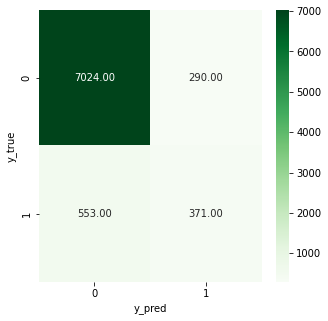

In [63]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm_KNN,annot = True, cmap = 'Greens', fmt='.2f')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### **Model Performace**

#### **Accuracy and Confusion matrix**

|Model|  Train  |   Test  |
|-----|---------|---------|
| SVM |  90.85% | 90.73 % |
|-----|---------|---------|
| KNN | 89.67 % | 89.90%  |

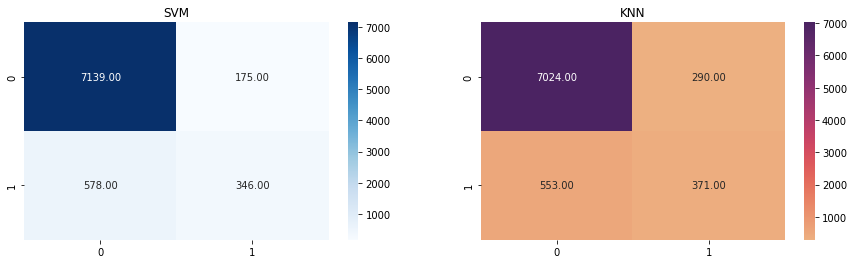

In [114]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("SVM")
sns.heatmap(cm_SVM,annot = True, cmap = 'Blues', fmt='.2f')

plt.subplot(1, 2, 2)
plt.title("KNN")
sns.heatmap(cm_KNN,annot = True, cmap = 'flare', fmt='.2f')
plt.show()

From subplots we can compare the model performance between SVM and KNN in visual format showing class imbalance as the dataset is biased towards target  0 >> than target value 1.

- F1 score is acutal measure of accuracy in case of imabalanced dataset.
- For SVM and KNN both we have 45% of F1 score approximately, indicating that even though accuracy is 90% there is bias towards one of the class due to which F1 is lesses.



## **b) Compare the Knn model with a few K values and find the best k model. Describe each model performance (10 points)** 

In [65]:
## perform cross-validation for a range of model hyperparameters for the Custom model ##
K = [6, 9, 12]
for k in K:
    # define the pipeline for manhatten distance
    p_manhat = Pipeline([('scaler', StandardScaler()), ('knn', KNNClassifier(k, metric = 'minkowski', p = 1))])
    # define the pipeline for euclidean distance
    p_euclid = Pipeline([('scaler', StandardScaler()), ('knn', KNNClassifier(k, metric = 'minkowski', p = 2))])
    # define the pipeline for cosine distance
    p_cosine = Pipeline([('scaler', StandardScaler()), ('knn', KNNClassifier(k, metric = 'cosine'))])


    # cross validate for p_manhat
    cv_classifier_analysis(p_manhat, Xtrain, Ytrain, k, scoring_metrics, 'MANHATTEN DISTANCE')
    # cross validate for p_euclid
    cv_classifier_analysis(p_euclid, Xtrain, Ytrain, k, scoring_metrics, 'EUCLIDEAN DISTANCE')
    # cross validate for p_cosine
    cv_classifier_analysis(p_cosine, Xtrain, Ytrain, k, scoring_metrics, 'COSINE DISTANCE')
    

RESULTS FOR K = 6, MANHATTEN DISTANCE
Mean Accuracy: 0.8995
Mean Precision: 0.6297
Mean Recall: 0.2672
Mean F1: 0.3748
RESULTS FOR K = 6, EUCLIDEAN DISTANCE
Mean Accuracy: 0.9004
Mean Precision: 0.6288
Mean Recall: 0.2874
Mean F1: 0.3940
RESULTS FOR K = 6, COSINE DISTANCE
Mean Accuracy: 0.9002
Mean Precision: 0.6217
Mean Recall: 0.2960
Mean F1: 0.4006
RESULTS FOR K = 9, MANHATTEN DISTANCE
Mean Accuracy: 0.9019
Mean Precision: 0.6229
Mean Recall: 0.3297
Mean F1: 0.4308
RESULTS FOR K = 9, EUCLIDEAN DISTANCE
Mean Accuracy: 0.9033
Mean Precision: 0.6211
Mean Recall: 0.3671
Mean F1: 0.4610
RESULTS FOR K = 9, COSINE DISTANCE
Mean Accuracy: 0.9036
Mean Precision: 0.6203
Mean Recall: 0.3762
Mean F1: 0.4678
RESULTS FOR K = 12, MANHATTEN DISTANCE
Mean Accuracy: 0.9013
Mean Precision: 0.6563
Mean Recall: 0.2624
Mean F1: 0.3746
RESULTS FOR K = 12, EUCLIDEAN DISTANCE
Mean Accuracy: 0.9033
Mean Precision: 0.6546
Mean Recall: 0.3014
Mean F1: 0.4122
RESULTS FOR K = 12, COSINE DISTANCE
Mean Accuracy: 0

#### **Comparision for KNN models with different K**

|K val|  Acc.   |   F1    |
|-----|---------|---------|
| 3   | 89.67 % | 46.63 % |
|-----|---------|---------|
| 6   | 89.95 % | 37.48 % |
|-----|---------|---------|
| 9   | 90.19 % | 43.08 % |
|-----|---------|---------|
| 12  | 90.13 % | 37.46 % |




- Overall Model with k value 9 is giving best performance for all the distance formula.

- As the k value increases from 1 the accuracy improves till the maximum is reached then it again starts platueing followed by decreasing.

- We can plot graphical representation of **accuracy vs k** or **error vs k** to get best model using elbow technique as well.

- Here we are using tabular format to compare different k values.

- The model accuracy and f1 is maximized for model with k value = 9.

Interpretation of k :-

- In this case of  KNN, “k” is the number of neighbors to be checked. 

- In this supervised learning method, we are trying to classify a point based on the known classification of "k" of its neighbor points.



## **c) Compare your SVM model with various kernel methods (linear, rbf, and polynomial). Explain each Kernal parameter (12 points)**


### **Linear Kernel**

- When data is linearly separable we can use linear kernel.

In [51]:
## Linear SVM

class LinearSvmClassifier:
    
    def __init__(self, C):
        self.C = C                                 # <---
        self.alpha = None
        self.w = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # Gram matrix of (X.y)
        Xy = X * y[:, np.newaxis]
        GramXy = np.matmul(Xy, Xy.T)

        # Lagrange dual problem
        def Ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        # Constraints on alpha of the shape :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y), 'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: -Ld0dAlpha(GramXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis=0)  
        epsilon = 1e-6
        self.supportVectors = X[self.alpha > epsilon]
        # Support vectors is at a distance <= 1 to the separation plan
        # => use min support vector to compute the intercept, assume label is in {-1, 1}
        signedDist = np.matmul(self.supportVectors, self.w)
        minDistArg = np.argmin(signedDist)
        supportLabels = y[self.alpha > epsilon]
        self.intercept = supportLabels[minDistArg] - signedDist[minDistArg]
    
    def predict(self, X):
        """ Predict y value in {-1, 1} """
        assert(self.w is not None)
        assert(self.w.shape[0] == X.shape[1])
        return 2 * (np.matmul(X, self.w) > 0) - 1

In [74]:
model_linear_SVM = LinearSvmClassifier(C=1)
model_linear_SVM.fit(Xtrain[:100,:], Ytrain[0:100])

In [98]:
predictions = model_linear_SVM.predict(Xtest[:100,:])
accuracy_score(Ytest[0:100], predictions)

0.58

In [99]:
cm_model_linear_svm = confusion_matrix(Ytest[0:100], predictions)

### **RBF Kernel**

## Kernel Tricks

- Kernel tricks Kernels help us smartly add more features to the data to make it linearly separable. 
- But actually adding features can make model slow
- So we use these tricks which are smart in the sense, they use mathematical properties to get exactly the same results as if actually added features and making model slow.

- In RBF method we add more features to the data is to using the similarity features.
- A similarity feature measures how far a value of an existing feature is from a landmark.

In [79]:
class KernelSvmClassifier:
    
    def __init__(self, C, kernel):
        self.C = C                               
        self.kernel = kernel          # <---
        self.alpha = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # --->
        # Gram matrix of h(x) y
        hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, X),
                                  1, X)   
        yp = y.reshape(-1, 1)
        GramHXy = hXX * np.matmul(yp, yp.T) 
        # <---

        # Lagrange dual problem
        def Ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        # Constraints on alpha of the shape :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y),     'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramHXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: -Ld0dAlpha(GramHXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        # --->
        epsilon = 1e-8
        supportIndices = self.alpha > epsilon
        self.supportVectors = X[supportIndices]
        self.supportAlphaY = y[supportIndices] * self.alpha[supportIndices]
        # <---
    
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        # --->
        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2)
        
        d = np.apply_along_axis(predict1, 1, X)
        return 2 * (d > 0) - 1
        # <---

In [80]:
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)

In [81]:
model_GRBF_SVM = KernelSvmClassifier(C=5, kernel=GRBF)
model_GRBF_SVM.fit(Xtrain[:100,:], Ytrain[0:100])

In [96]:
predictions = model_GRBF_SVM.predict(Xtest[:100,:])
accuracy_score(Ytest[0:100], predictions)

0.88

In [97]:
cm_model_GRBF_SVM = confusion_matrix(Ytest[0:100], predictions)

### **Polynomial Kernel**

- In polymonial kernel we create more features by using polynomial combinations for the existing features.

In [83]:
gamma = None
   
def poly_kernel_fn(X, Y):
   
   K = np.zeros((X.shape[0],Y.shape[0]))
   K = (gamma*X.dot(Y.T))**4
   return K

In [84]:
 gamma = 1/(5*Xtrain.var())

In [85]:
model_poly_SVM = KernelSvmClassifier(C=5, kernel=GRBF)
model_poly_SVM.fit(Xtrain[:100,:], Ytrain[0:100])

In [86]:
predictions = model_GRBF_SVM.predict(Xtest[:100,:])
accuracy_score(Ytest[0:100], predictions)

0.88

In [88]:
cm_model_poly_SVM = confusion_matrix(Ytest[0:100], predictions)

### Kernel SVM Comparison

|Linear|  rbf   |   poly  |
|----- |--------|---------|
|  58% | 88.00% | 88.00%  |

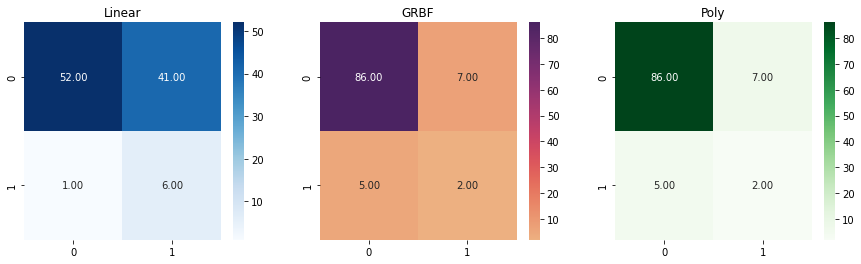

In [102]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 3, 1)
plt.title("Linear")
sns.heatmap(cm_model_linear_svm,annot = True, cmap = 'Blues', fmt='.2f')


plt.subplot(1, 3, 2)
plt.title("GRBF")
sns.heatmap(cm_model_GRBF_SVM,annot = True, cmap = 'flare', fmt='.2f')

plt.subplot(1, 3, 3)
plt.title("Poly")
sns.heatmap(cm_model_poly_SVM,annot = True, cmap = 'Greens', fmt='.2f')
plt.show()

As expected GRBF and Poly are better as compared to Linear kernel with improved accuracy.

## **d) Analyze your SVM and Knn model performance with outlier and imbalanced samples (make a sample from the given dataset). How do the SVM and Knn models handle the outliers and imbalanced datasets with statistical evidence? (10 points)**


As per scientific journals,
- We can leverage the IQR algorithm to search for outliers in the original training data.
- The records with outliers are then oversampled with replacement and finally added back to the original data. 
- The oversampling percentage should be chosen arbitrarily depending on the number of outliers in the data, with the objective to highly increase outliers presence in the data to analyse it further. 
- This process may lead to class imbalance, we then introduce Imbalanced handling methods listed below to balance out the class distribution before classification.

Methods for Handling Imbalanced Data

1.   Random Under Sampling
2.   Random Over Sampling - Synthetic Minority Over-Sampling Technique (SMOTE)





###**Statistical Evidence**

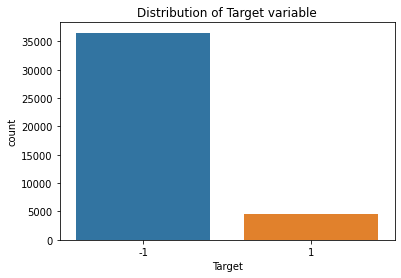

In [73]:
## Class Imbalance using Statistical evidence
sns.countplot(x=data['y'], data=data)
plt.xlabel("Target")
plt.title("Distribution of Target variable")
plt.show()

In [71]:
data['y'].value_counts()

-1    36548
 1     4640
Name: y, dtype: int64

As per count plot, we can conclude that :

- Total Observations = 41188

- yes   Observations =4640

- no Observations = 36548

- Event Rate= 11 %



- We can randomly sample 4640 records from no observations and make it equal to yes observations so this is Oversampling.
- We can replicate yes records 10 times to make it equal to no samples and this make it Undersampling.


Feature Name : age
Skew : 0.78


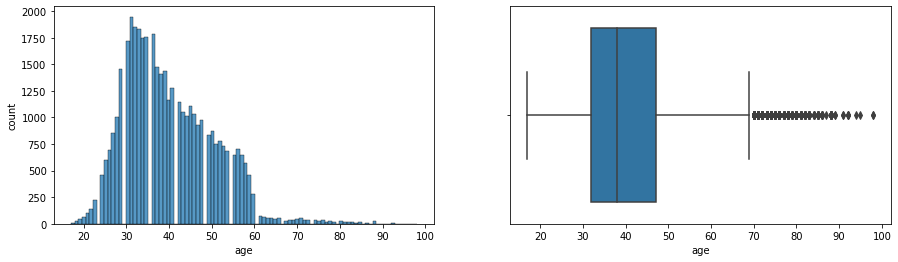

Feature Name : duration
Skew : 3.26


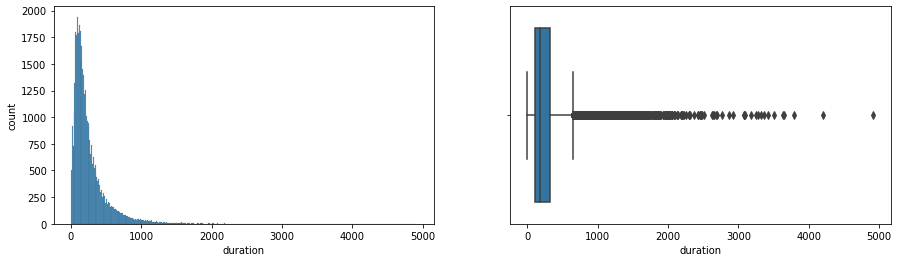

Feature Name : campaign
Skew : 4.76


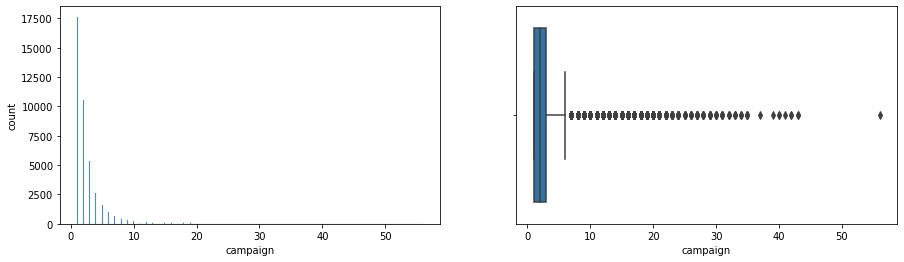

Feature Name : pdays
Skew : -4.92


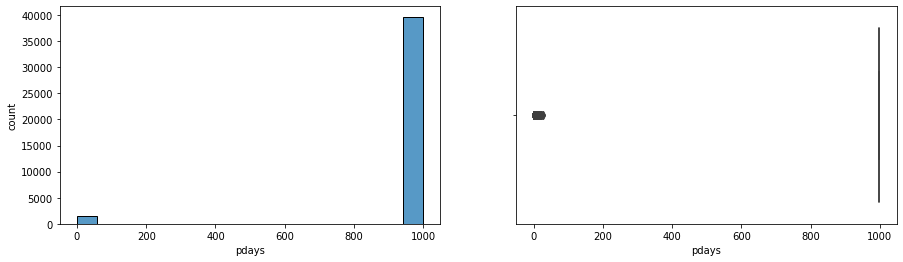

In [76]:
## Outliers using Statistical evidence  

## we have to use boxplots for identifying outliers
## Note outliers can be seen only in numetic features, for categorical and binary features we use term imbalance


for col in data[["age","duration","campaign","pdays"]]:
    print('Feature Name :',col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=data[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

As per the box plots, we can see following columns are having outliers:

- Age
- Duration
- Campaign
- pdays

- We can select existing dataset with these 4 features to further analyse how SVM and KNN handles the outliers and imbalanced data.

In [32]:
x_sampled = data[["age","duration","campaign","pdays"]]

In [33]:
scaler = StandardScaler()
x_sampled = scaler.fit_transform(x_sampled)

In [34]:
Xtrain01, Xtest01, Ytrain01, Ytest01 = train_test_split(x_sampled, y, test_size=0.2, random_state=1234)

#### SVM

In [38]:
clf.fit(Xtrain01, Ytrain01)
predictions = clf.predict(Xtest01)

In [47]:
accuracy_score(Ytest01, predictions)


0.898761835396941

In [48]:
f1_score(Ytest01, predictions)

0.3359872611464968

#### KNN

In [43]:
knn = KNNClassifier(3, metric = 'minkowski', p = 1)
knn.fit(Xtrain01, Ytrain01)

In [44]:
Ypred = knn.predict(Xtest)

In [45]:
accuracy_score(Ytest01, Ypred)

0.8896576839038601

In [49]:
f1_score(Ytest01, Ypred)

0.43080776455854725

- As per comparative study, the model accuracy is dropped after selecting only features with outliers.
- We need not select records as the dataset is already imbalanced with 90% No observations and 10% Yes observations.